In [1]:
import newutils
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('legend',fontsize = 14)

## Cooperative

In [2]:
import numpy as np

import pessimistic as sca
from ddpg_agent import Agent

from collections import deque

# Create simulation environment
env = sca.MarketEnvironment()

# Initialize Feed-forward DNNs for Actor and Critic models. 
agent1 = Agent(state_size=env.observation_space_dimension(), action_size=env.action_space_dimension(),random_seed = 1225)
agent2 = Agent(state_size=env.observation_space_dimension(), action_size=env.action_space_dimension(),random_seed = 108)
# Set the liquidation time
lqt = 40

# Set the number of trades
n_trades = 50

# Set trader's risk aversion
tr1 = 5e-6
tr2 = 5e-6

# Set the number of episodes to run the simulation
episodes = 3200
shortfall_list = []
shortfall_hist1 = np.array([])
shortfall_hist2 = np.array([])
shortfall_deque1 = deque(maxlen=100)
shortfall_deque2 = deque(maxlen=100)
for episode in range(episodes): 
    # Reset the enviroment
    cur_state = env.reset(seed = episode, liquid_time = lqt, num_trades = n_trades, lamb1 = tr1,lamb2 = tr2)

    # set the environment to make transactions
    env.start_transactions()

    for i in range(n_trades + 1):
      
        # Predict the best action for the current state. 
        cur_state1 = np.delete(cur_state,8)
        cur_state2 = np.delete(cur_state,7)
        #print(cur_state[5:])
        action1 = agent1.act(cur_state1, add_noise = True)
        action2 = agent2.act(cur_state2, add_noise = True)
        #print(action1,action2)
        # Action is performed and new state, reward, info are received. 
        new_state, reward1, reward2, done1, done2, info = env.step(action1,action2,'cooperative')
        
        # current state, action, reward, new state are stored in the experience replay
        new_state1 = np.delete(new_state,8)
        new_state2 = np.delete(new_state,7)
        agent1.step(cur_state1, action1, reward1, new_state1, done1)
        agent2.step(cur_state2, action2, reward2, new_state2, done2)
        # roll over new state
        cur_state = new_state

        if info.done1 and info.done2:
            shortfall_hist1 = np.append(shortfall_hist1, info.implementation_shortfall1)
            shortfall_deque1.append(info.implementation_shortfall1)
            
            shortfall_hist2 = np.append(shortfall_hist2, info.implementation_shortfall2)
            shortfall_deque2.append(info.implementation_shortfall2)
            break
        
    if (episode + 1) % 100 == 0: # print average shortfall over last 100 episodes
        print('\rEpisode [{}/{}]\tAverage Shortfall for Agent1: ${:,.2f}'.format(episode + 1, episodes, np.mean(shortfall_deque1)))        
        print('\rEpisode [{}/{}]\tAverage Shortfall for Agent2: ${:,.2f}'.format(episode + 1, episodes, np.mean(shortfall_deque2)))
        shortfall_list.append([np.mean(shortfall_deque1),np.mean(shortfall_deque2)])
print('\nAverage Implementation Shortfall for Agent1: ${:,.2f} \n'.format(np.mean(shortfall_hist1)))
print('\nAverage Implementation Shortfall for Agent2: ${:,.2f} \n'.format(np.mean(shortfall_hist2)))

Episode [100/3200]	Average Shortfall for Agent1: $1,676,872.61
Episode [100/3200]	Average Shortfall for Agent2: $1,701,743.93
Episode [200/3200]	Average Shortfall for Agent1: $1,840,139.34
Episode [200/3200]	Average Shortfall for Agent2: $1,840,164.15
Episode [300/3200]	Average Shortfall for Agent1: $1,840,178.57
Episode [300/3200]	Average Shortfall for Agent2: $1,840,178.57
Episode [400/3200]	Average Shortfall for Agent1: $1,840,178.57
Episode [400/3200]	Average Shortfall for Agent2: $1,840,178.57
Episode [500/3200]	Average Shortfall for Agent1: $1,840,178.57
Episode [500/3200]	Average Shortfall for Agent2: $1,840,178.57
Episode [600/3200]	Average Shortfall for Agent1: $1,840,178.57
Episode [600/3200]	Average Shortfall for Agent2: $1,840,178.57
Episode [700/3200]	Average Shortfall for Agent1: $1,840,178.57
Episode [700/3200]	Average Shortfall for Agent2: $1,840,178.57
Episode [800/3200]	Average Shortfall for Agent1: $1,838,438.29
Episode [800/3200]	Average Shortfall for Agent2: $1,839

In [3]:
shortfall = np.array(shortfall_list)

In [4]:
np.save('pessimistic-cooperative.npy',shortfall)

## Competitive

In [5]:
import numpy as np

import pessimistic as sca
from ddpg_agent import Agent

from collections import deque

# Create simulation environment
env = sca.MarketEnvironment()

# Initialize Feed-forward DNNs for Actor and Critic models. 
agent1 = Agent(state_size=env.observation_space_dimension(), action_size=env.action_space_dimension(),random_seed = 1225)
agent2 = Agent(state_size=env.observation_space_dimension(), action_size=env.action_space_dimension(),random_seed = 108)
# Set the liquidation time
lqt = 40

# Set the number of trades
n_trades = 50

# Set trader's risk aversion
tr1 = 5e-6
tr2 = 5e-6

# Set the number of episodes to run the simulation
episodes = 3200
shortfall_list = []
shortfall_hist1 = np.array([])
shortfall_hist2 = np.array([])
shortfall_deque1 = deque(maxlen=100)
shortfall_deque2 = deque(maxlen=100)
for episode in range(episodes): 
    # Reset the enviroment
    cur_state = env.reset(seed = episode, liquid_time = lqt, num_trades = n_trades, lamb1 = tr1,lamb2 = tr2)

    # set the environment to make transactions
    env.start_transactions()

    for i in range(n_trades + 1):
      
        # Predict the best action for the current state. 
        cur_state1 = np.delete(cur_state,8)
        cur_state2 = np.delete(cur_state,7)
        #print(cur_state[5:])
        action1 = agent1.act(cur_state1, add_noise = True)
        action2 = agent2.act(cur_state2, add_noise = True)
        #print(action1,action2)
        # Action is performed and new state, reward, info are received. 
        new_state, reward1, reward2, done1, done2, info = env.step(action1,action2,'competitive')
        
        # current state, action, reward, new state are stored in the experience replay
        new_state1 = np.delete(new_state,8)
        new_state2 = np.delete(new_state,7)
        agent1.step(cur_state1, action1, reward1, new_state1, done1)
        agent2.step(cur_state2, action2, reward2, new_state2, done2)
        # roll over new state
        cur_state = new_state

        if info.done1 and info.done2:
            shortfall_hist1 = np.append(shortfall_hist1, info.implementation_shortfall1)
            shortfall_deque1.append(info.implementation_shortfall1)
            
            shortfall_hist2 = np.append(shortfall_hist2, info.implementation_shortfall2)
            shortfall_deque2.append(info.implementation_shortfall2)
            break
        
    if (episode + 1) % 100 == 0: # print average shortfall over last 100 episodes
        print('\rEpisode [{}/{}]\tAverage Shortfall for Agent1: ${:,.2f}'.format(episode + 1, episodes, np.mean(shortfall_deque1)))        
        print('\rEpisode [{}/{}]\tAverage Shortfall for Agent2: ${:,.2f}'.format(episode + 1, episodes, np.mean(shortfall_deque2)))
        shortfall_list.append([np.mean(shortfall_deque1),np.mean(shortfall_deque2)])
print('\nAverage Implementation Shortfall for Agent1: ${:,.2f} \n'.format(np.mean(shortfall_hist1)))
print('\nAverage Implementation Shortfall for Agent2: ${:,.2f} \n'.format(np.mean(shortfall_hist2)))

Episode [100/3200]	Average Shortfall for Agent1: $1,691,913.48
Episode [100/3200]	Average Shortfall for Agent2: $1,701,290.99
Episode [200/3200]	Average Shortfall for Agent1: $1,840,129.41
Episode [200/3200]	Average Shortfall for Agent2: $1,840,054.65
Episode [300/3200]	Average Shortfall for Agent1: $1,840,178.57
Episode [300/3200]	Average Shortfall for Agent2: $1,840,178.57
Episode [400/3200]	Average Shortfall for Agent1: $1,840,178.57
Episode [400/3200]	Average Shortfall for Agent2: $1,840,178.57
Episode [500/3200]	Average Shortfall for Agent1: $1,840,155.66
Episode [500/3200]	Average Shortfall for Agent2: $1,840,171.46
Episode [600/3200]	Average Shortfall for Agent1: $1,752,147.80
Episode [600/3200]	Average Shortfall for Agent2: $1,806,433.11
Episode [700/3200]	Average Shortfall for Agent1: $874,659.75
Episode [700/3200]	Average Shortfall for Agent2: $789,475.54
Episode [800/3200]	Average Shortfall for Agent1: $1,235,221.21
Episode [800/3200]	Average Shortfall for Agent2: $587,136.3

In [11]:
shortfall = np.array(shortfall_list)
np.save('pessimistic-competitive.npy',shortfall)

In [12]:
A = np.load('./Results/1e-6_shortfall_list.npy')
B = np.load('pessimistic-cooperative.npy')
C = np.load('pessimistic-competitive.npy')

In [13]:
A_list = []
B_list = []
C_list = []
for i in range(len(B)):
    A_list.append(A[i])
    B_list.append(B[i].sum())
    C_list.append(C[i].sum())

In [14]:
df = pd.DataFrame()
df['Independent'] = A_list
df['Competitive'] = B_list
df['Cooperative'] = C_list

/opt/homebrew/anaconda3/envs/reinforcement/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
/opt/homebrew/anaconda3/envs/reinforcement/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  """


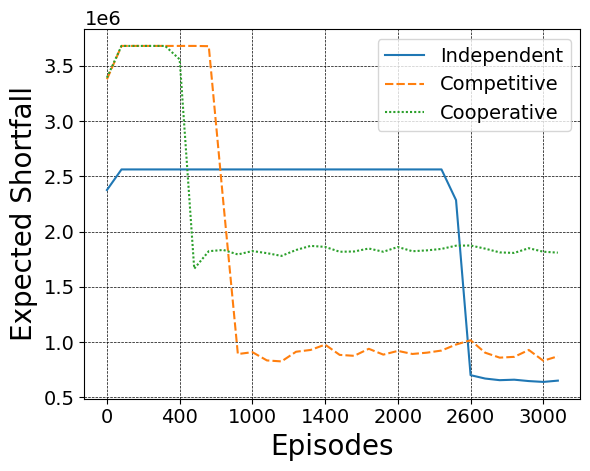

In [17]:
ax = sns.lineplot(data = df)
ax.set_ylabel('Expected Shortfall',fontsize = 20)
ax.set_xlabel('Episodes',fontsize = 20)
ax.set_xticklabels([0,0,400,1000,1400,2000,2600,3000],fontsize = 14)
ax.grid(b=True, which='major', color='black', linewidth=0.5,linestyle = '--')